# Импорт библиотек

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from operator import itemgetter

# EDA

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Содержание датасета:**
* age - возраст
* sex - пол (1 - мужчина, 0 - женщина)
* cp - тип боли в груди
* trestbps - артериальное давление в покое
* chol - сывороточный холестерин
* fbs - уровень сахара в крови натощак
* restecg - результаты экг в покое
* thalach - максимально достигнутая чсс
* exang - стенокардия при физической нагрузке
* oldpeak - депрессия ST сегмента при физической нагрузке
* slope - наклон пикового st сегмента при нагрузке
* ca - количество крупных сосудов (0-3), окрашенных при флюороскопии
* thal - 0 = нормальный, 1 = фиксированный дефект, 2 = обратимый дефект
* target - наличие болезни

In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# Разделим выборку

In [10]:
y = df['target']
x = df.drop(['target'], axis = 1)

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 0)

# Логистическая регрессия

In [13]:
lr = LogisticRegression()
lr_prediction = lr.fit(x_train, y_train).predict(x_test)

# SVM

In [14]:
svr = svm.SVR()
svr_prediction = svr.fit(x_train, y_train).predict(x_test)

# Дерево решений

In [15]:
dt = DecisionTreeRegressor(random_state=0)
dt_prediction = dt.fit(x_train, y_train).predict(x_test)

# Оценка качества моделей

In [16]:
print("Linear regression: ", mean_squared_error(y_test, lr_prediction))
print("SVM: ", mean_squared_error(y_test, svr_prediction))
print("Decision tree: ", mean_squared_error(y_test, dt_prediction))

Linear regression:  0.14146341463414633
SVM:  0.04264875882252695
Decision tree:  0.0


In [17]:
print("Linear regression: ", r2_score(y_test, lr_prediction))
print("SVM: ", r2_score(y_test, svr_prediction))
print("Decision tree: ", r2_score(y_test, dt_prediction))

Linear regression:  0.43305359526988374
SVM:  0.8290755207403495
Decision tree:  1.0


# Важность признаков

In [18]:
list(zip(x.columns.values, dt.feature_importances_))

[('age', 0.08327324581520917),
 ('sex', 0.06744438766554109),
 ('cp', 0.2620208903056958),
 ('trestbps', 0.03996351167432581),
 ('chol', 0.07458044754488027),
 ('fbs', 0.0213110818816126),
 ('restecg', 0.0),
 ('thalach', 0.07967578364816712),
 ('exang', 0.017589775586969354),
 ('oldpeak', 0.09444809393622243),
 ('slope', 0.01591128449308529),
 ('ca', 0.1524340266116806),
 ('thal', 0.09134747083661057)]

In [19]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Sorting the values of the importance of features in descending order
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Features names
    labels = [x for x,_ in sorted_list]
    # Features importance
    data = [x for _,x in sorted_list]
    # Graph output
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Values output
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

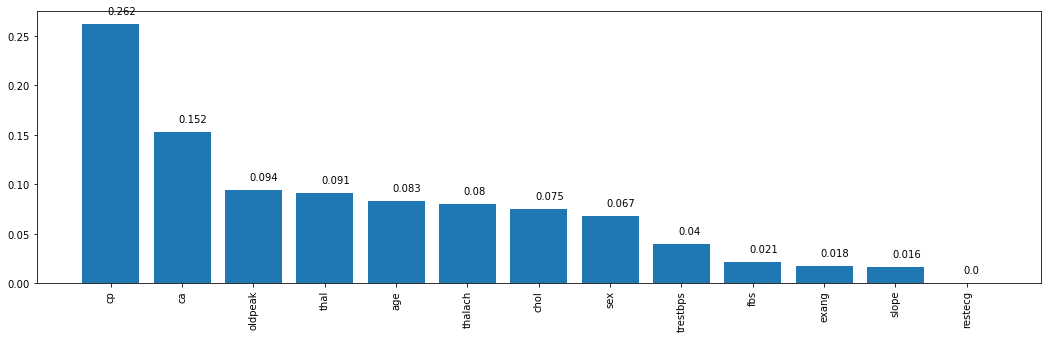

In [20]:
dt_fl, dt_fd = draw_feature_importances(dt, x)

# Визуализация дерева решений

[Text(171.00775862068966, 206.56799999999998, 'X[2] <= 0.167\nmse = 0.25\nsamples = 820\nvalue = 0.511'),
 Text(106.78965517241379, 184.824, 'X[11] <= 0.125\nmse = 0.186\nsamples = 397\nvalue = 0.247'),
 Text(75.04137931034482, 163.07999999999998, 'X[12] <= 0.833\nmse = 0.25\nsamples = 169\nvalue = 0.503'),
 Text(46.179310344827584, 141.336, 'X[8] <= 0.5\nmse = 0.191\nsamples = 97\nvalue = 0.742'),
 Text(23.089655172413792, 119.592, 'X[4] <= 0.435\nmse = 0.1\nsamples = 62\nvalue = 0.887'),
 Text(11.544827586206896, 97.848, 'X[7] <= 0.195\nmse = 0.05\nsamples = 57\nvalue = 0.947'),
 Text(5.772413793103448, 76.10399999999998, 'mse = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(17.317241379310346, 76.10399999999998, 'mse = 0.0\nsamples = 54\nvalue = 1.0'),
 Text(34.63448275862069, 97.848, 'X[0] <= 0.677\nmse = 0.16\nsamples = 5\nvalue = 0.2'),
 Text(28.86206896551724, 76.10399999999998, 'mse = 0.0\nsamples = 4\nvalue = 0.0'),
 Text(40.40689655172414, 76.10399999999998, 'mse = 0.0\nsamples = 1\n

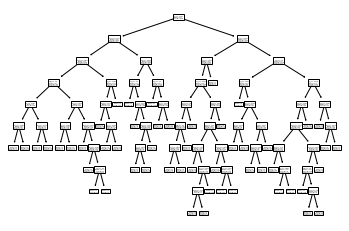

In [24]:
tree.plot_tree(dt) 